In [1]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00


In [2]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7204d01fb276fb1bf1fd3cbade515eb61085843a99821fc74cd0fbaa93f394cb
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import optuna
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test (2).csv")

In [ ]:
def train_fix(x):#データの前処理
  df_train=x.rename(columns={"Age":"年齢","Gender":"性別","T_Bil":"総ビリルビン (Total Bilirubin)","D_Bil":"直接ビリルビン",
                         "ALP":"アルカリフォスファター ゼ","ALT_GPT":"アラニンアミノトランスフェラーゼ","AST_GOT":"アスパラギン酸アミノトランスフェラーゼ",
                         "TP":"総タンパク","Alb":"アルブミン","AG_ratio":"アルブミン/グロブリン比"})
  df_train["性別"]=df_train["性別"].apply(lambda x:1 if x=="Female" else 0)

  x=df_train.drop("disease",axis=1)#[['総ビリルビン (Total Bilirubin)', '直接ビリルビン', 'アルカリフォスファター ゼ', 'アラニンアミノトランスフェラーゼ', 'アスパラギン酸アミノトランスフェラーゼ', 'アルブミン/グロブリン比']]
  y=df_train["disease"]

  return x,y

In [ ]:
def test_fix(x):#データの前処理(testデータ)
  df_test=x.rename(columns={"Age":"年齢","Gender":"性別","T_Bil":"総ビリルビン (Total Bilirubin)","D_Bil":"直接ビリルビン",
                         "ALP":"アルカリフォスファター ゼ","ALT_GPT":"アラニンアミノトランスフェラーゼ","AST_GOT":"アスパラギン酸アミノトランスフェラーゼ",
                         "TP":"総タンパク","Alb":"アルブミン","AG_ratio":"アルブミン/グロブリン比"})
  df_test["性別"]=df_test["性別"].apply(lambda x:1 if x=="Female" else 0)

  #df_test=df_test[['総ビリルビン (Total Bilirubin)', '直接ビリルビン', 'アルカリフォスファター ゼ', 'アラニンアミノトランスフェラーゼ', 'アスパラギン酸アミノトランスフェラーゼ', 'アルブミン/グロブリン比']]
  x_columns=df_test.columns

  df_test=model_std.transform(df_test)
  df_test=pd.DataFrame(df_test,columns=x_columns)

  return  df_test

In [ ]:
def objective(trail):
  params={
      'C': trail.suggest_loguniform('C', 0.001, 20),
      'kernel': trail.suggest_categorical('kernel', ['linear', 'rbf', 'sigmoid']),
      'degree': trail.suggest_int('degree', 1, 10),
      'gamma': trail.suggest_loguniform('gamma', 0.001, 10),
      'probability': True,
      "max_iter":10000}

  svc = SVC(**params)

  ada_params = {
        'base_estimator': svc,
        'n_estimators': 100,
        'random_state': 0,
        'learning_rate': trail.suggest_loguniform('learning_rate', 0.01, 1.0)
    }

  model = AdaBoostClassifier(**ada_params)

  model.fit(x_train,y_train)
  score=roc_auc_score(y_train,model.predict_proba(x_train)[:,1])

  return score

In [ ]:
x,y=train_fix(df_train)

x_columns=x.columns

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

model_std=StandardScaler()
model_std.fit(x_train)

x_train=model_std.transform(x_train)
x_train=pd.DataFrame(x_train,columns=x_columns)
x_test=model_std.transform(x_test)
x_test=pd.DataFrame(x_test,columns=x_columns)

#グリッドサーチ

In [ ]:
from sklearn.pipeline import Pipeline
params={"base_estimator__C":[1,5,10],
        "base_estimator__kernel":['linear', 'rbf', 'sigmoid'],
        'base_estimator__degree':[0.1,1,5],
        'base_estimator__gamma':[0.1,1,5],
        'base_estimator__probability': [True],
        "base_estimator__max_iter":[10000],
        'learning_rate':[0.1,0.3,0.5],
        'n_estimators': [100,150],
        'random_state': [0],
        'algorithm': ['SAMME']}

svc=SVC()
model=AdaBoostClassifier(base_estimator=svc)

grid_search = GridSearchCV(model, params, cv=5,scoring="roc_auc")
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

#ベイズ最適化

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

best_params=study.best_params
best_r2_score=study.best_value
print("Best Params:",best_params)
print("Best R2 score:",best_r2_score)

In [ ]:
best_params

{'C': 0.07245118256689359,
 'kernel': 'rbf',
 'degree': 10,
 'gamma': 9.854243644434371,
 'learning_rate': 0.1559374531257873}

In [ ]:
df_train_x=pd.concat([x_train,x_test])
df_train_y=pd.concat([y_train,y_test])

In [ ]:
model=AdaBoostClassifier(SVC(C=0.07245118256689359,
                             kernel='rbf',
                             degree=10,
                             gamma=9.854243644434371),
                         learning_rate=0.1559374531257873,n_estimators=100,random_state= 0,algorithm='SAMME'
                         )
scores=cross_val_score(model,df_train_x,df_train_y,cv=5,scoring='roc_auc')

In [ ]:
scores

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [ ]:
model=SVC(**best_params,probability=True,max_iter=10000)
model.fit(df_train_x,df_train_y)

SVC(C=4.6402728148565355, gamma=8.811457518680331, max_iter=10000,
    probability=True)

In [ ]:
df_test=test_fix(df_test)
df_test.head()

,総ビリルビン (Total Bilirubin),直接ビリルビン,アルカリフォスファター ゼ,アラニンアミノトランスフェラーゼ,アスパラギン酸アミノトランスフェラーゼ,アルブミン/グロブリン比
0,-0.328115,-0.273148,-0.308310,-0.186773,-0.386318,0.658094
1,-0.314975,-0.315720,-0.200041,-0.219962,-0.413056,-0.526213
2,-0.332076,-0.266409,-0.299559,-0.191538,-0.374715,0.614729
3,-0.315315,-0.279838,-0.382810,-0.203818,-0.380456,0.598586
4,-0.372429,-0.304180,-0.339891,-0.151718,-0.332134,0.621624


In [ ]:
y_pred=model.predict(df_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0]


In [ ]:
df_submit=pd.read_csv("sample_submit (2).csv",header=None)
df_submit[1]=y_pred

In [ ]:
df_submit.to_csv("submit_0912_3.csv",header=None,index=None)

特徴量の選択

In [ ]:
len(x_columns)

10

In [ ]:
feature_words=[]
for i in range(7,11):
  combiations=itertools.combinations(x_columns,i)
  for combo in combiations:
    feature_words.append(combo)


In [ ]:
auc_list=[]
for features in feature_words:
  x_train_train=x_train[list(features)]
  x_test_test=x_test[list(features)]
  model=AdaBoostClassifier(SVC(C=0.08700197334999436,
                             kernel='rbf',
                             degree=9,gamma=7.429524645092006,probability= True,max_iter=10000),
                          n_estimators=100,
                          random_state=0,learning_rate=0.4017770797709288)
  model.fit(x_train_train,y_train)
  auc=roc_auc_score(y_test,model.predict_proba(x_test_test)[:,1])
  auc_list.append(auc)

In [ ]:
auc_list

In [ ]:
np.argmax(auc_list)

157

In [ ]:
feature_words[113]

('総ビリルビン (Total Bilirubin)',
 '直接ビリルビン',
 'アルカリフォスファター ゼ',
 'アラニンアミノトランスフェラーゼ',
 'アスパラギン酸アミノトランスフェラーゼ',
 '総タンパク',
 'アルブミン/グロブリン比')

In [ ]:
feature_words[157]

('性別',
 '総ビリルビン (Total Bilirubin)',
 '直接ビリルビン',
 'アルカリフォスファター ゼ',
 'アラニンアミノトランスフェラーゼ',
 'アスパラギン酸アミノトランスフェラーゼ',
 '総タンパク',
 'アルブミン/グロブリン比')

#EDA

In [5]:
df_train=df_train.rename(columns={"Age":"年齢","Gender":"性別","T_Bil":"総ビリルビン (Total Bilirubin)","D_Bil":"直接ビリルビン",
                         "ALP":"アルカリフォスファター ゼ","ALT_GPT":"アラニンアミノトランスフェラーゼ","AST_GOT":"アスパラギン酸アミノトランスフェラーゼ",
                         "TP":"総タンパク","Alb":"アルブミン","AG_ratio":"アルブミン/グロブリン比"})

In [6]:
df_gender_sep=df_train[["Gender","Age"]].groupby("Gender").count()

KeyError: ignored

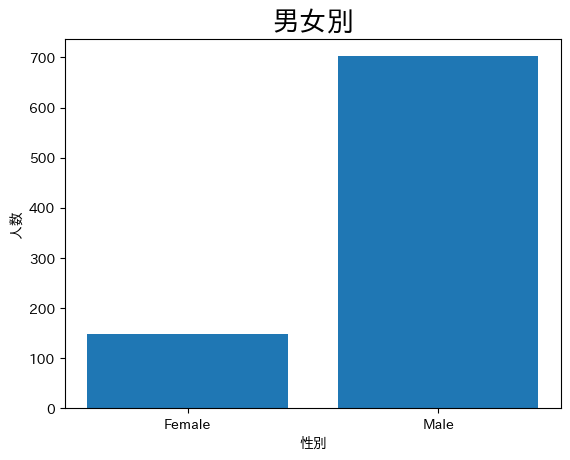

In [ ]:
fig,ax=plt.subplots()
ax.bar(df_gender_sep.index,df_gender_sep['Age'])
ax.set_xlabel("性別")
ax.set_ylabel("人数")
ax.set_title("男女別",size=20)
plt.show()

In [ ]:
df_Male=df_train.loc[df_train["Gender"]=="Male"][["Age","Gender"]]
df_Female=df_train.loc[df_train["Gender"]=="Female"][["Age","Gender"]]

KeyError: ignored

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.histplot(df_Male["Age"], kde=True, label="Male", color="blue",ax=ax[0])
sns.histplot(df_Female["Age"], kde=True, label="Female", color="red",ax=ax[0])
ax[0].set_xlabel("年齢")
ax[0].set_ylabel("人数")
ax[0].set_title("男女ごとの年齢別ヒストグラム")

ax[1].boxplot([df_Male["Age"],df_Female["Age"]])
ax[1].set_xticklabels(["Male", "Female"])
ax[1].set_ylabel("年齢")
ax[1].set_xlabel("性別")
plt.show()

In [ ]:
df_gender_disease=df_train.loc[df_train["disease"]==1][["disease","Gender"]].groupby("Gender").count()
df_gender_total=df_train[["disease","Gender"]].groupby("Gender").count().sort_values("Gender",ascending=False)

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(12,8))
ax[0,0].bar(df_gender_sep.index,df_gender_sep['Age'])
ax[0,0].set_xlabel("男女別検査者数",size=13)

ax[0,1].bar(df_gender_disease.index,df_gender_disease["disease"])
ax[0,1].set_xlabel("男女別肺疾患者数",size=13)

ax[1,0].pie(df_gender_total["disease"],labels=df_gender_total.index,startangle=90,counterclock=False,autopct="%1.2f%%")
ax[1,1].pie(df_gender_disease.sort_values("Gender",ascending=False)["disease"],labels=df_gender_disease.sort_values("Gender",ascending=False).index,startangle=90,counterclock=False,autopct="%1.2f%%")
plt.show()

In [ ]:
df_gender_disease.sort_values("Gender",ascending=False)["disease"]

In [ ]:
df_train

In [ ]:
sns.scatterplot(x=df_train["T_Bil"],y=df_train["D_Bil"],hue=df_train["disease"])

In [ ]:
df_disease_man=df_train.loc[(df_train["disease"]==1)&(df_train["Gender"]=="Male")][["disease","Age","Gender"]]
df_disease_woman=df_train.loc[(df_train["disease"]==1)&(df_train["Gender"]=="Female")][["disease","Age","Gender"]]

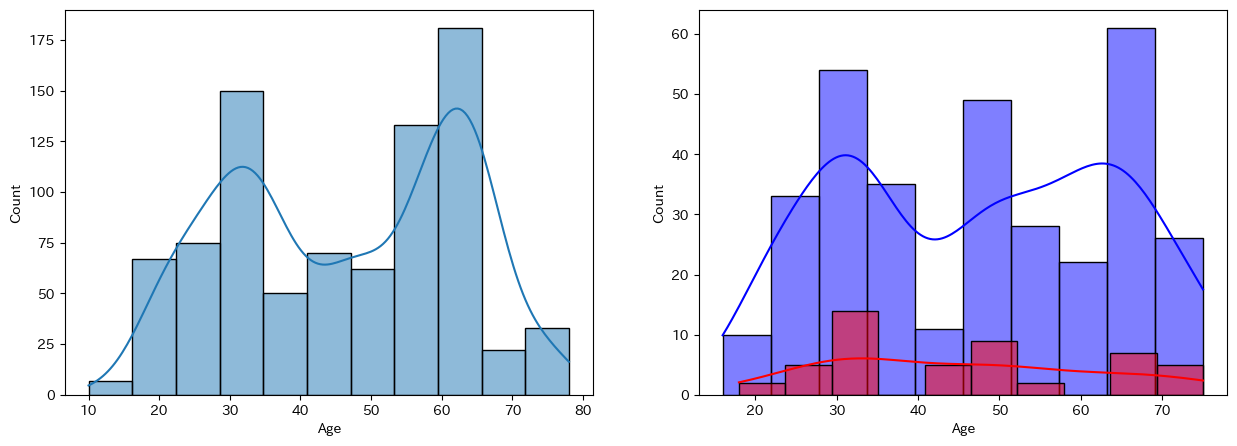

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(15,5))
sns.histplot(df_train["Age"],kde=True,label="全体",ax=ax[0])
sns.histplot(df_disease_man["Age"],kde=True,label="肺疾患者",bins=10,color="blue",ax=ax[1])
sns.histplot(df_disease_woman["Age"],kde=True,label="肺疾患者",bins=10,color="red",ax=ax[1])
plt.show()

In [ ]:
df_train_cell=df_train.drop(["年齢","性別","disease"],axis=1)
df_train_cell_columns=df_train_cell.columns

In [ ]:
df_train_cell_disease=df_train.loc[df_train["disease"]==1]
df_train_cell_notdisease=df_train.loc[df_train["disease"]!=1]

In [ ]:
fig,ax=plt.subplots(nrows=len(df_train_cell_columns),ncols=2,figsize=(30,15))
for x,i in enumerate(df_train_cell_columns):
  sns.histplot(df_train_cell_disease[i],kde=True,ax=ax[x,0])
  sns.histplot(df_train_cell_notdisease[i],kde=True,ax=ax[x,1])

In [ ]:
y=df_train["disease"]
df_train.drop(["性別","disease"],axis=1,inplace=True)

In [ ]:
x_columns=df_train.columns
model_std=StandardScaler()
df_train=model_std.fit_transform(df_train)
df_train=pd.DataFrame(df_train,columns=x_columns)
df_train["disease"]=y

In [ ]:
df_train

,年齢,総ビリルビン (Total Bilirubin),直接ビリルビン,アルカリフォスファター ゼ,アラニンアミノトランスフェラーゼ,アスパラギン酸アミノトランスフェラーゼ,総タンパク,アルブミン,アルブミン/グロブリン比,disease
0,0.753431,-0.335955,-0.290949,-0.259863,-0.195492,-0.356975,-0.257757,-0.724042,-0.606631,0
1,1.361556,-0.247057,-0.262171,-0.254671,0.062088,0.033929,-0.169826,-0.832608,-1.731472,1
2,1.118306,-0.389083,-0.335085,0.242516,-0.201270,-0.276256,-1.290839,-1.837506,-1.627531,0
3,1.118306,-0.286844,-0.250342,0.484775,-0.052323,-0.059131,-0.077493,0.172224,-0.688739,1
4,-1.496631,0.052258,-0.260844,-0.246862,-0.146773,0.990291,-1.422039,-0.801915,-0.519213,0
...,...,...,...,...,...,...,...,...,...,...
845,-1.314194,-0.343913,-0.268011,-0.282450,-0.192094,-0.371224,-0.246754,0.187604,0.674411,0
846,0.631806,-0.302763,-0.286804,-0.291669,-0.187972,-0.371573,0.568460,0.181706,0.670500,0
847,0.206119,-0.319617,-0.298346,-0.209115,-0.010171,-0.103554,0.592201,0.369809,-0.693678,1
848,-0.888506,-0.346157,-0.298939,-0.289870,-0.164083,-0.059698,-1.294305,-0.654882,0.335604,0


In [ ]:
df_train_deisease=df_train.loc[df_train["disease"]==1]
df_train_notdeisease=df_train.loc[df_train["disease"]==0]

<Axes: xlabel='アラニンアミノトランスフェラーゼ', ylabel='Count'>

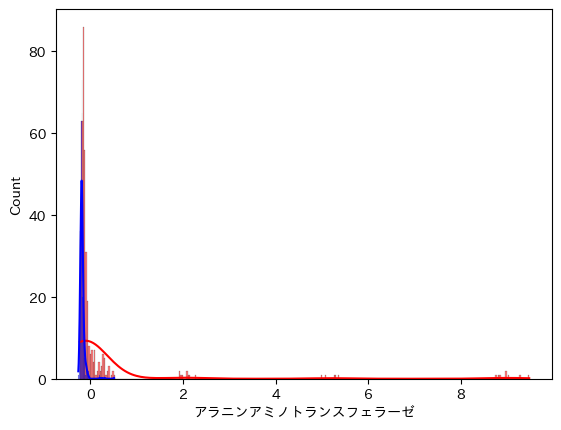

In [ ]:
fig,ax=plt.subplots()
sns.histplot(df_train_deisease["アラニンアミノトランスフェラーゼ"],color="red",kde=True)
sns.histplot(df_train_notdeisease["アラニンアミノトランスフェラーゼ"],color="blue",kde=True)

In [ ]:
df_a=df_train.drop(["性別","総ビリルビン (Total Bilirubin)"],axis=1)
df_a_columns=df_a.columns

fig,ax=plt.subplots(nrows=len(df_a_columns),figsize=(10,30))
for x,i in enumerate(df_a_columns):
  ax[x].scatter(df_train["総ビリルビン (Total Bilirubin)"],df_train[i])
  ax[x].set_xlabel("総ビリルビン (Total Bilirubin)")
  ax[x].set_ylabel(i)
plt.show()

In [20]:
df_columns=['年齢', '性別', '直接ビリルビン', 'アルカリフォスファター ゼ', 'アラニンアミノトランスフェラーゼ', 'アスパラギン酸アミノトランスフェラーゼ', '総タンパク', 'アルブミン', 'アルブミン/グロブリン比']
len(df_columns)

9

In [49]:
combinations =itertools.combinations(df_columns,7)
features_list=[]
for i in combinations:
  i=list(i)
  i.append('総ビリルビン (Total Bilirubin)')
  features_list.append(i)

In [51]:
len(features_list)

36